In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
columns = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha" ,"fDist" ,"class"]
df = pd.read_csv("magic04.data", names=columns)
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
0       -8.2027  40.0920   81.8828     g  
1       -9.9574   6.3609  205.2610     g  
2      -45.2160  76.9600  256.7880     g  
3       -7.1513  10.4490  116.7370     g  
4       21.8393   4.6480  356.4620     g  
...         ...      ...       ...   ...  
19015    2.8766   2.4229  106.8258     h  
19016   -2.9632  86.7975  247.4560     h  
19017   -9.4662  30.2987  256.5166     h  
19018  -63.8389  84.6874  408.3166     h  
19019   31.4755  52.7310  272.3174     h  

[19020 rows x 11 columns]

In [3]:
class_labels_to_int = {'g': 1, 'h': 0}

df['class'] = df['class'].apply(lambda x: class_labels_to_int[x])
df


fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0  

[19020 rows x 11 columns]

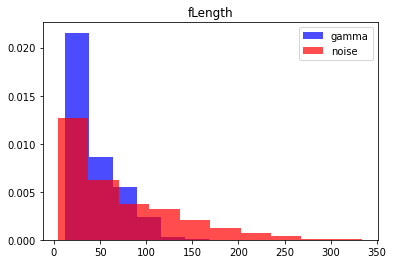

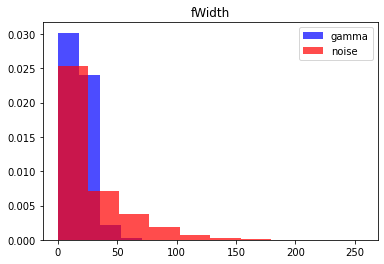

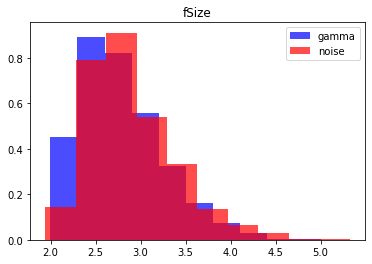

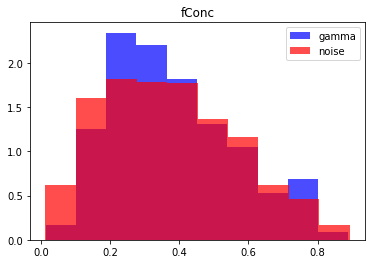

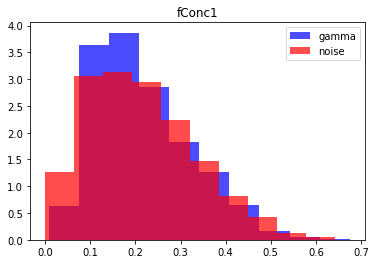

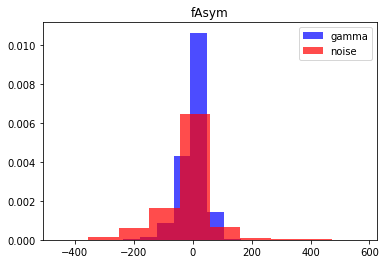

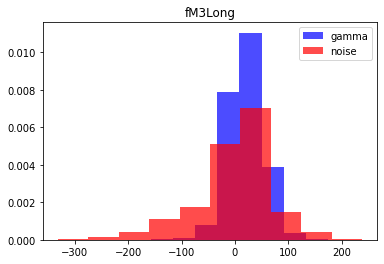

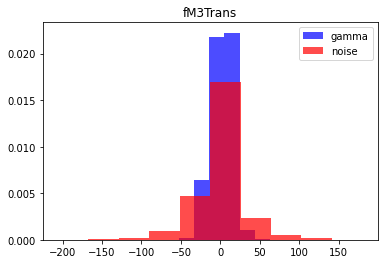

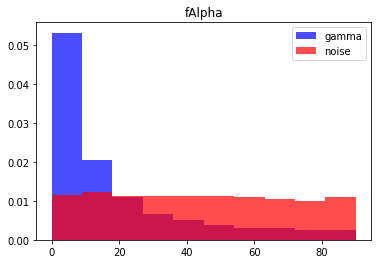

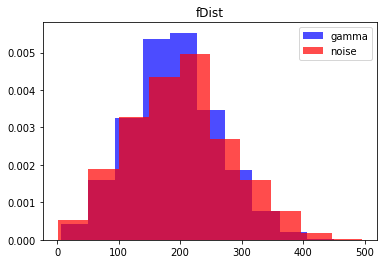

In [4]:
for label in columns[:-1]:
  plt.hist(df[df['class']==1][label], color="blue", label="gamma", alpha=0.7, density=True)
  plt.hist(df[df['class']==0][label], color="red", label="noise", alpha=0.7, density=True)
  plt.title(label)
  plt.legend()
  plt.show()

In [5]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [6]:
len(train[train['class'] == 1]), len(train[train['class'] == 0])

(7394, 4018)

In [7]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  
  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))
  return data, X, y

In [8]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=True)
test, X_test, y_test = scale_dataset(test, oversample=False)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1392
           1       0.84      0.85      0.84      2412

    accuracy                           0.80      3804
   macro avg       0.79      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
pred = nb_model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.64      0.40      0.49      1353
           1       0.72      0.87      0.79      2451

    accuracy                           0.71      3804
   macro avg       0.68      0.64      0.64      3804
weighted avg       0.69      0.71      0.68      3804



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred = log_model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1353
           1       0.84      0.82      0.83      2451

    accuracy                           0.78      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.78      0.79      3804



# Support Vector Machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [ ]:
pred = svc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79      1353
           1       0.89      0.87      0.88      2451

    accuracy                           0.85      3804
   macro avg       0.83      0.84      0.83      3804
weighted avg       0.85      0.85      0.85      3804



# Neural Networks

In [ ]:
import tensorflow as tf
from tqdm import tqdm

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val loss')
  ax1.set_xlabel('loss')
  ax1.set_ylabel('binary crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('accuracy')
  ax2.legend()
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10, )),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation="relu"),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation="sigmoid")
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), 
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])
  
  history = nn_model.fit(X_train, 
                       y_train,
                       epochs=epochs,
                       batch_size=batch_size,
                       validation_split=0.2,
                       verbose=0)
  
  return nn_model, history

Nodes: 16, Dropout: 0, LR: 0.1, Batch Size: 16


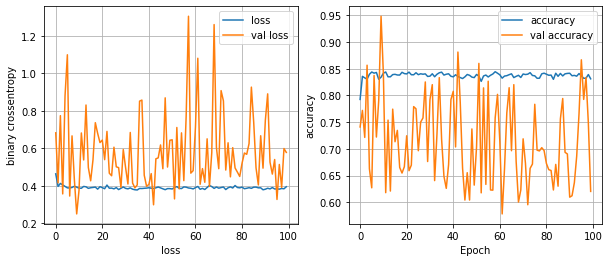

154/154 [==============================] - 0s 1ms/step - loss: 0.4495 - accuracy: 0.7732
Nodes: 16, Dropout: 0, LR: 0.1, Batch Size: 32


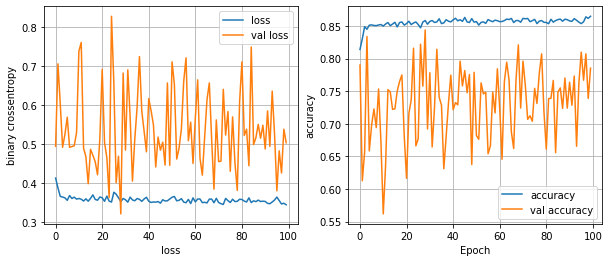

154/154 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.8339
Nodes: 16, Dropout: 0, LR: 0.1, Batch Size: 128


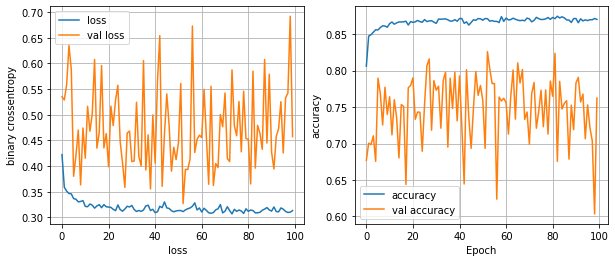

154/154 [==============================] - 0s 1ms/step - loss: 0.3683 - accuracy: 0.8422
Nodes: 16, Dropout: 0, LR: 0.001, Batch Size: 16


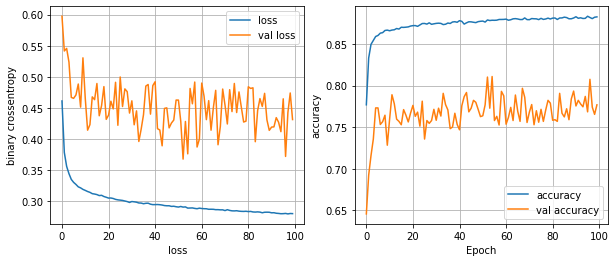

154/154 [==============================] - 0s 1ms/step - loss: 0.3706 - accuracy: 0.8436
Nodes: 16, Dropout: 0, LR: 0.001, Batch Size: 32


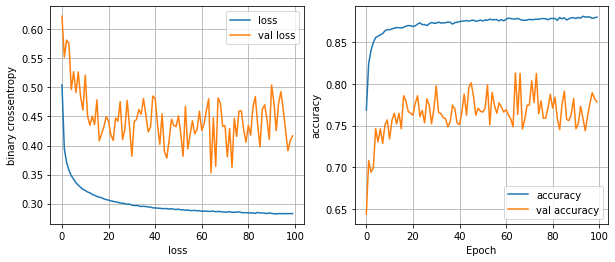

154/154 [==============================] - 0s 1ms/step - loss: 0.3624 - accuracy: 0.8341
Nodes: 16, Dropout: 0, LR: 0.001, Batch Size: 128


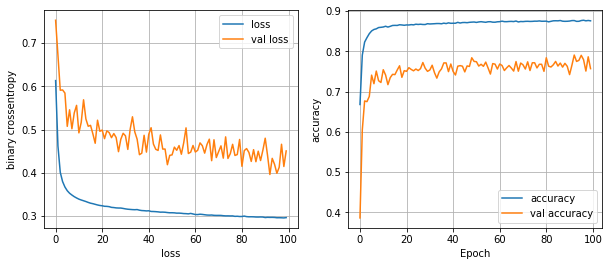

154/154 [==============================] - 0s 1ms/step - loss: 0.3783 - accuracy: 0.8327
Nodes: 16, Dropout: 0, LR: 0.0001, Batch Size: 16


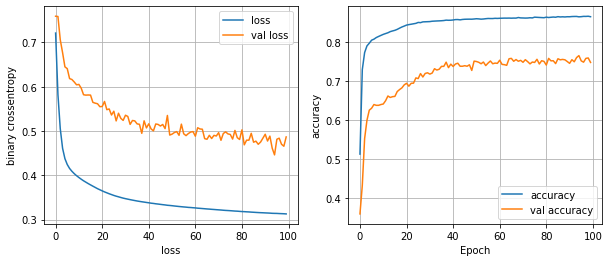

154/154 [==============================] - 0s 1ms/step - loss: 0.3856 - accuracy: 0.8266
Nodes: 16, Dropout: 0, LR: 0.0001, Batch Size: 32


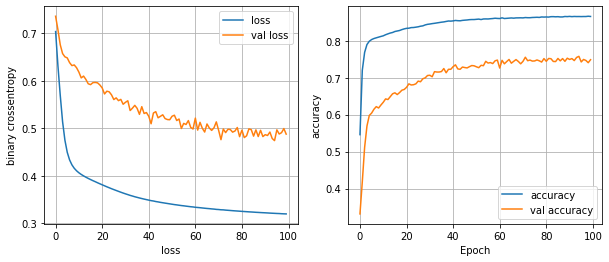

154/154 [==============================] - 0s 1ms/step - loss: 0.3885 - accuracy: 0.8304
Nodes: 16, Dropout: 0, LR: 0.0001, Batch Size: 128


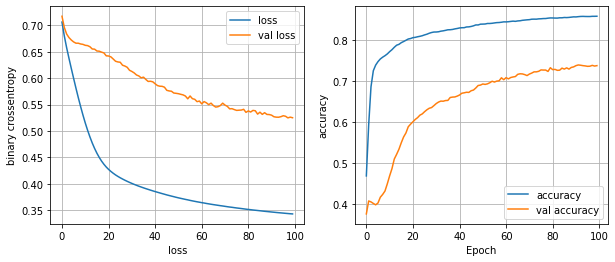

154/154 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8174
Nodes: 16, Dropout: 0, LR: 0.005, Batch Size: 16


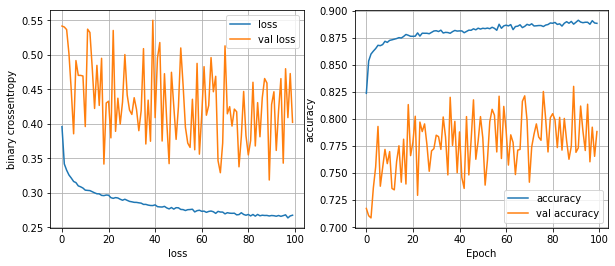

154/154 [==============================] - 0s 1ms/step - loss: 0.3647 - accuracy: 0.8432
Nodes: 16, Dropout: 0, LR: 0.005, Batch Size: 32


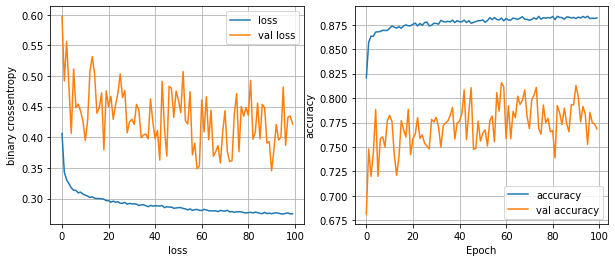

154/154 [==============================] - 0s 1ms/step - loss: 0.3871 - accuracy: 0.8371
Nodes: 16, Dropout: 0, LR: 0.005, Batch Size: 128


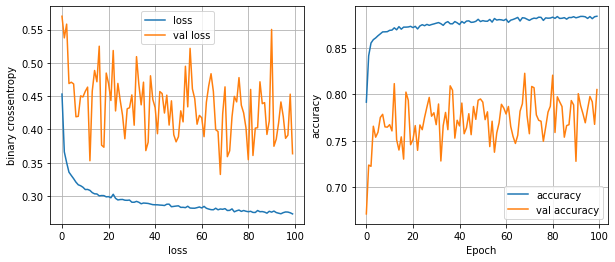

154/154 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8455
Nodes: 16, Dropout: 0, LR: 0.003, Batch Size: 16


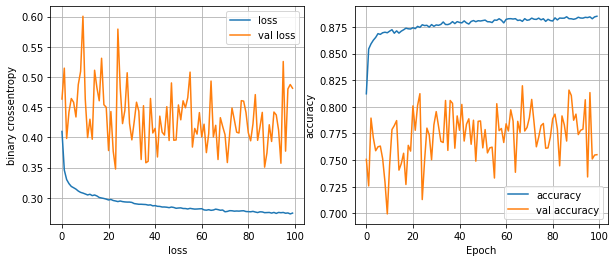

154/154 [==============================] - 0s 1ms/step - loss: 0.4050 - accuracy: 0.8270
Nodes: 16, Dropout: 0, LR: 0.003, Batch Size: 32


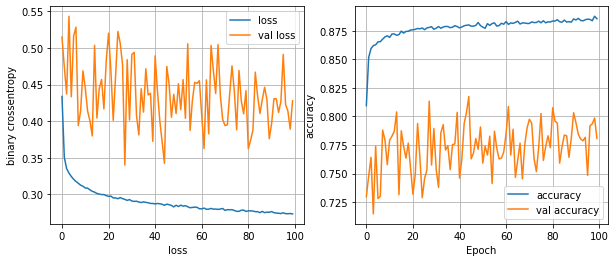

154/154 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.8331
Nodes: 16, Dropout: 0, LR: 0.003, Batch Size: 128


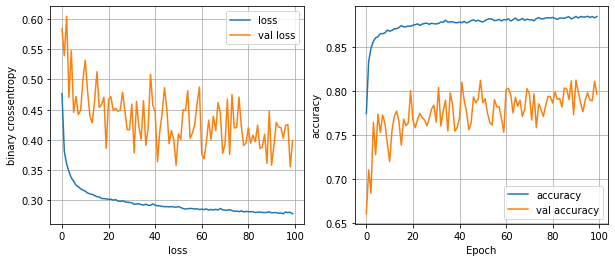

154/154 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.8450
Nodes: 16, Dropout: 0.2, LR: 0.1, Batch Size: 16


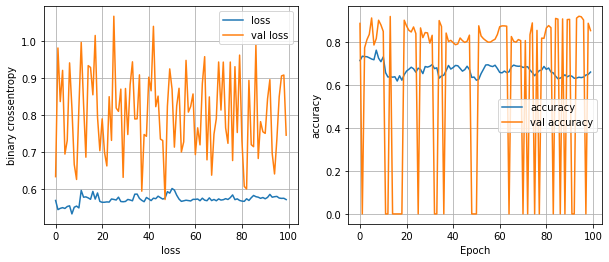

154/154 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.7648
Nodes: 16, Dropout: 0.2, LR: 0.1, Batch Size: 32


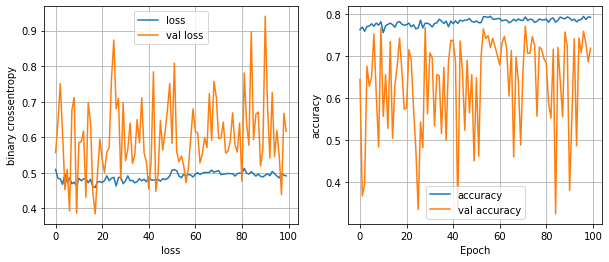

154/154 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.8022
Nodes: 16, Dropout: 0.2, LR: 0.1, Batch Size: 128


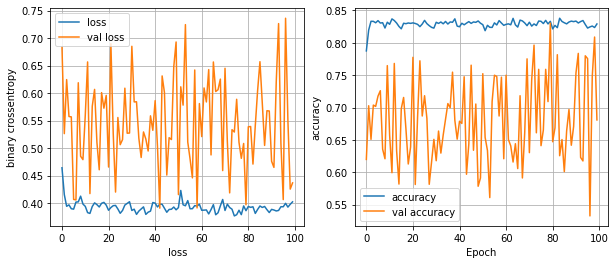

154/154 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.7987
Nodes: 16, Dropout: 0.2, LR: 0.001, Batch Size: 16


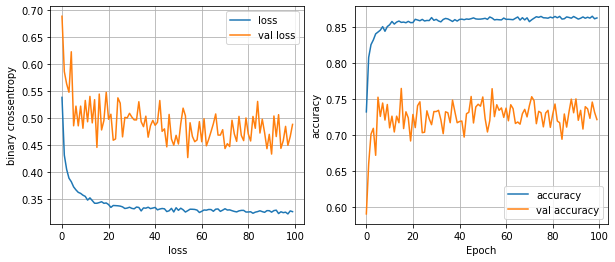

154/154 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.8162
Nodes: 16, Dropout: 0.2, LR: 0.001, Batch Size: 32


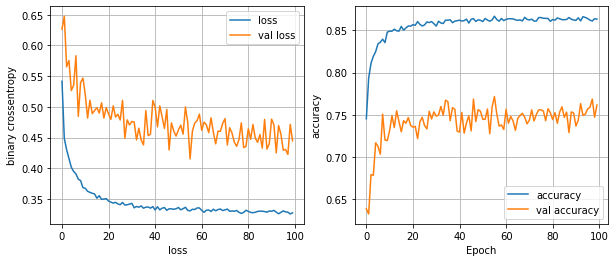

154/154 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.8306
Nodes: 16, Dropout: 0.2, LR: 0.001, Batch Size: 128


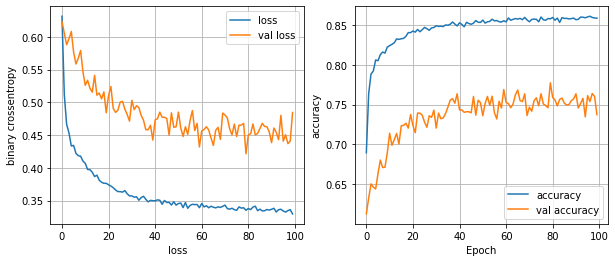

154/154 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.8264
Nodes: 16, Dropout: 0.2, LR: 0.0001, Batch Size: 16


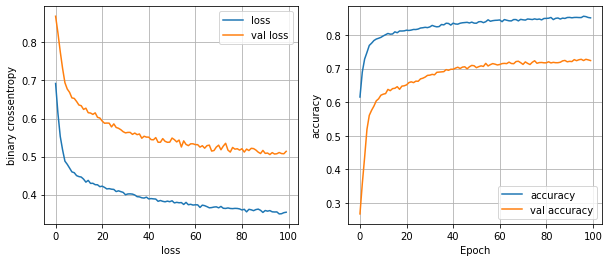

154/154 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8184
Nodes: 16, Dropout: 0.2, LR: 0.0001, Batch Size: 32


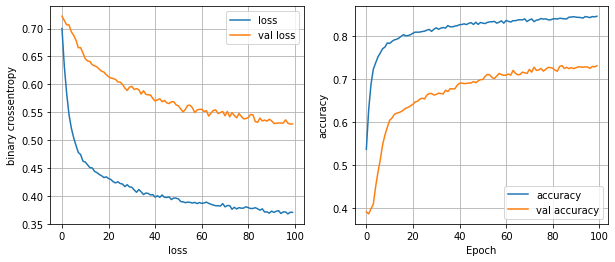

154/154 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8255
Nodes: 16, Dropout: 0.2, LR: 0.0001, Batch Size: 128


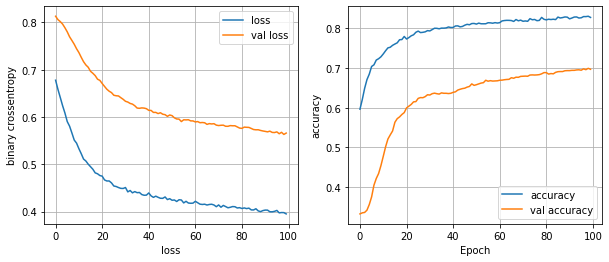

154/154 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8046
Nodes: 16, Dropout: 0.2, LR: 0.005, Batch Size: 16


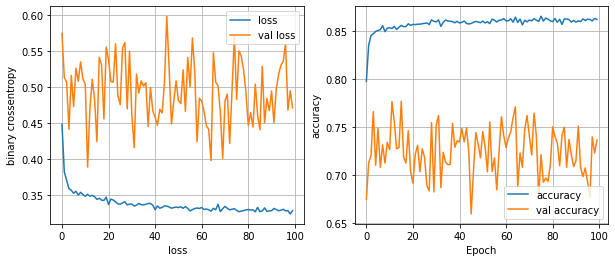

154/154 [==============================] - 0s 2ms/step - loss: 0.3793 - accuracy: 0.8306
Nodes: 16, Dropout: 0.2, LR: 0.005, Batch Size: 32


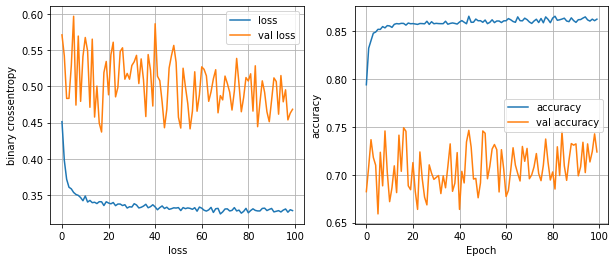

154/154 [==============================] - 0s 2ms/step - loss: 0.3710 - accuracy: 0.8286
Nodes: 16, Dropout: 0.2, LR: 0.005, Batch Size: 128


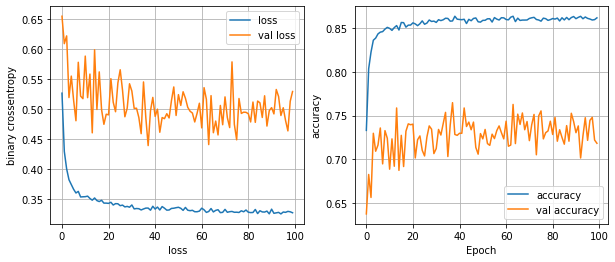

154/154 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8207
Nodes: 16, Dropout: 0.2, LR: 0.003, Batch Size: 16


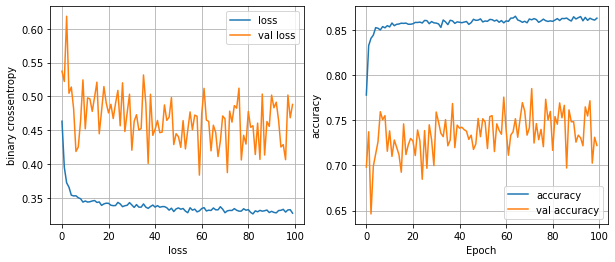

154/154 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.8205
Nodes: 16, Dropout: 0.2, LR: 0.003, Batch Size: 32


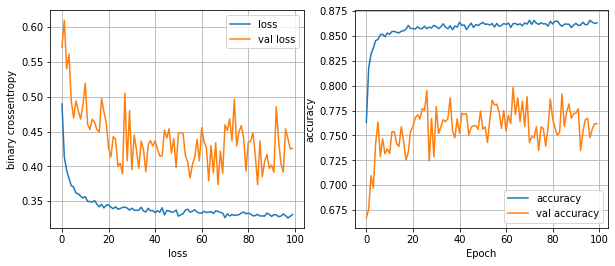

154/154 [==============================] - 0s 2ms/step - loss: 0.3637 - accuracy: 0.8339
Nodes: 16, Dropout: 0.2, LR: 0.003, Batch Size: 128


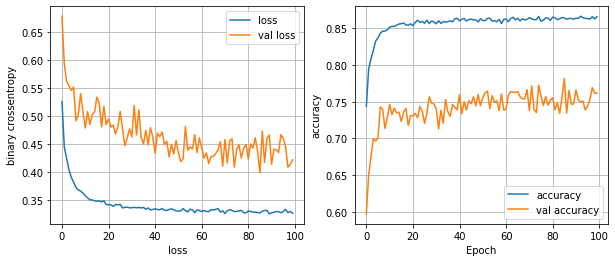

154/154 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.8318
Nodes: 32, Dropout: 0, LR: 0.1, Batch Size: 16


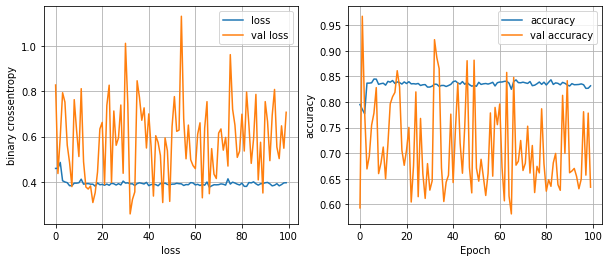

154/154 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.7727
Nodes: 32, Dropout: 0, LR: 0.1, Batch Size: 32


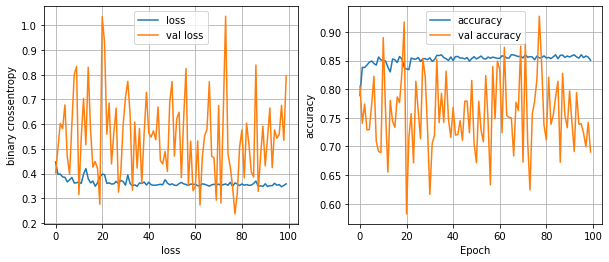

154/154 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.8065
Nodes: 32, Dropout: 0, LR: 0.1, Batch Size: 128


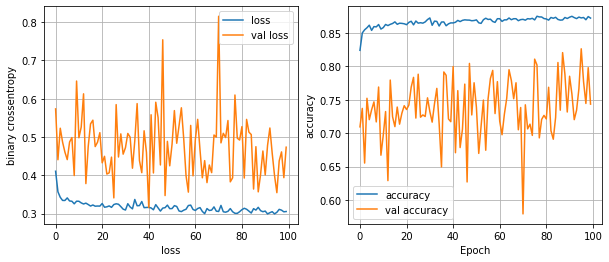

154/154 [==============================] - 0s 2ms/step - loss: 0.4062 - accuracy: 0.8239
Nodes: 32, Dropout: 0, LR: 0.001, Batch Size: 16


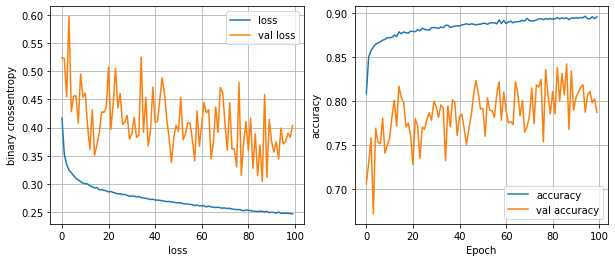

154/154 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8318
Nodes: 32, Dropout: 0, LR: 0.001, Batch Size: 32


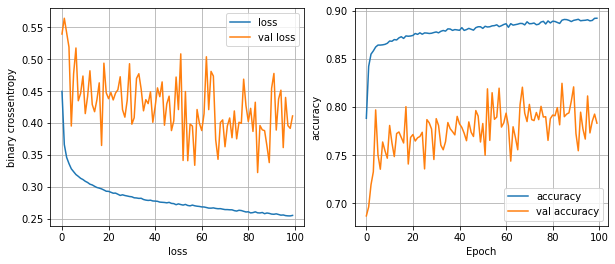

154/154 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8337
Nodes: 32, Dropout: 0, LR: 0.001, Batch Size: 128


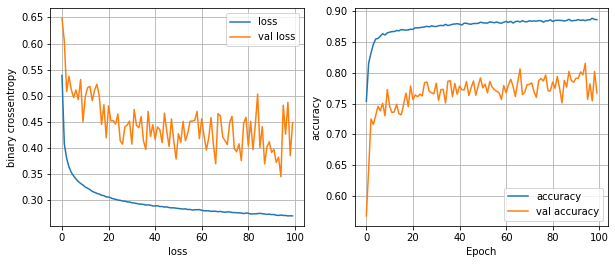

154/154 [==============================] - 0s 2ms/step - loss: 0.3814 - accuracy: 0.8347
Nodes: 32, Dropout: 0, LR: 0.0001, Batch Size: 16


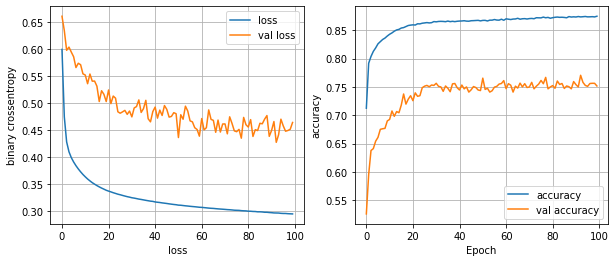

154/154 [==============================] - 0s 2ms/step - loss: 0.3738 - accuracy: 0.8339
Nodes: 32, Dropout: 0, LR: 0.0001, Batch Size: 32


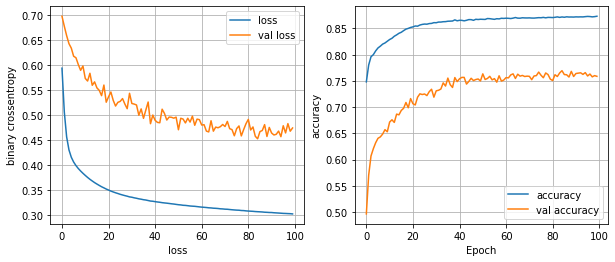

154/154 [==============================] - 0s 2ms/step - loss: 0.3790 - accuracy: 0.8300
Nodes: 32, Dropout: 0, LR: 0.0001, Batch Size: 128


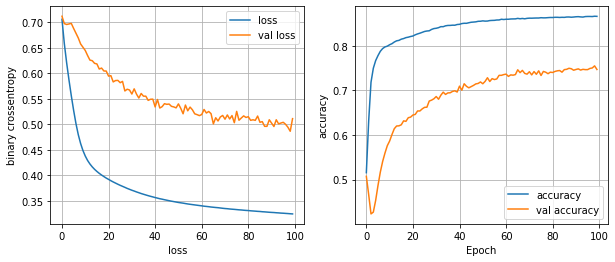

154/154 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.8251
Nodes: 32, Dropout: 0, LR: 0.005, Batch Size: 16


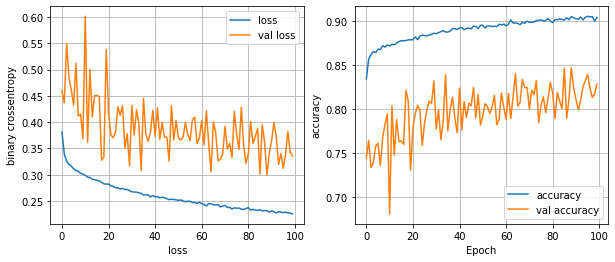

154/154 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.8262
Nodes: 32, Dropout: 0, LR: 0.005, Batch Size: 32


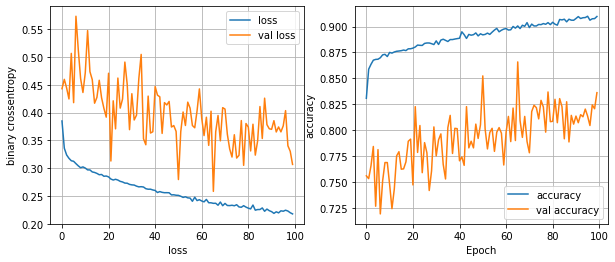

154/154 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.8412
Nodes: 32, Dropout: 0, LR: 0.005, Batch Size: 128


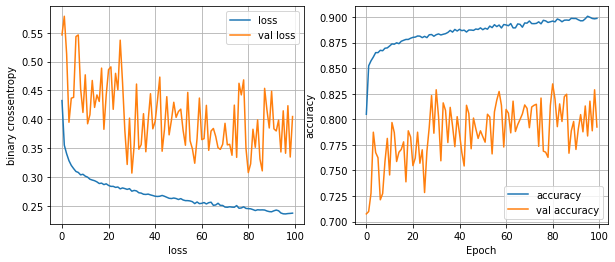

154/154 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.8280
Nodes: 32, Dropout: 0, LR: 0.003, Batch Size: 16


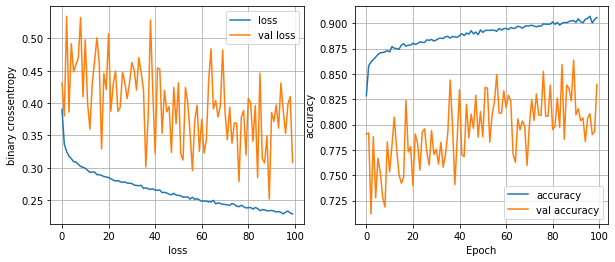

154/154 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8448
Nodes: 32, Dropout: 0, LR: 0.003, Batch Size: 32


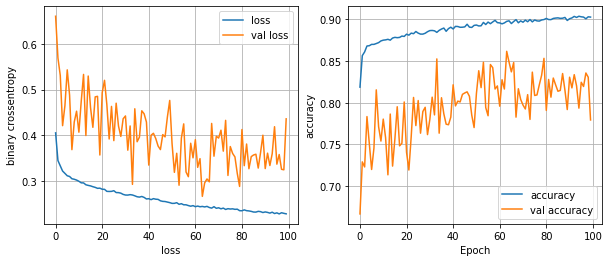

154/154 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.8349
Nodes: 32, Dropout: 0, LR: 0.003, Batch Size: 128


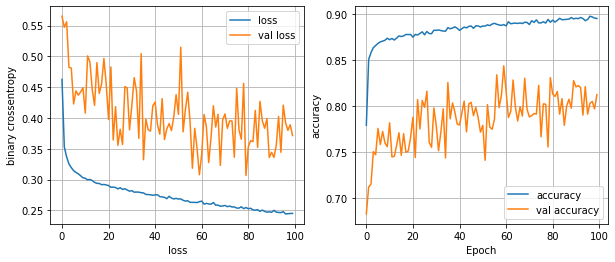

154/154 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8392
Nodes: 32, Dropout: 0.2, LR: 0.1, Batch Size: 16


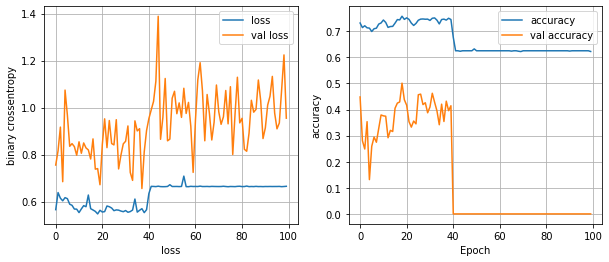

154/154 [==============================] - 0s 2ms/step - loss: 0.7204 - accuracy: 0.5000
Nodes: 32, Dropout: 0.2, LR: 0.1, Batch Size: 32


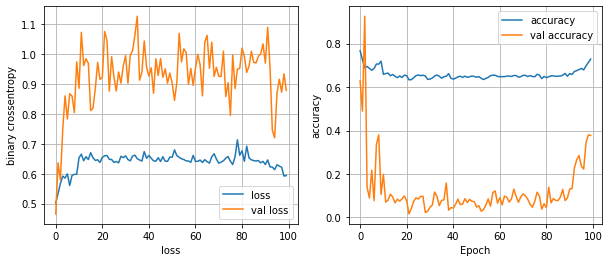

154/154 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.6470
Nodes: 32, Dropout: 0.2, LR: 0.1, Batch Size: 128


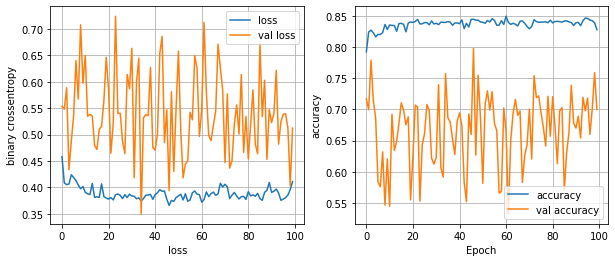

154/154 [==============================] - 0s 2ms/step - loss: 0.4297 - accuracy: 0.8132
Nodes: 32, Dropout: 0.2, LR: 0.001, Batch Size: 16


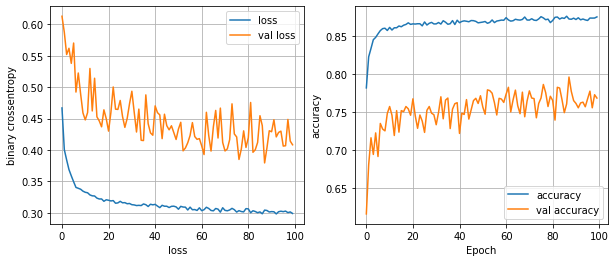

154/154 [==============================] - 0s 2ms/step - loss: 0.3570 - accuracy: 0.8375
Nodes: 32, Dropout: 0.2, LR: 0.001, Batch Size: 32


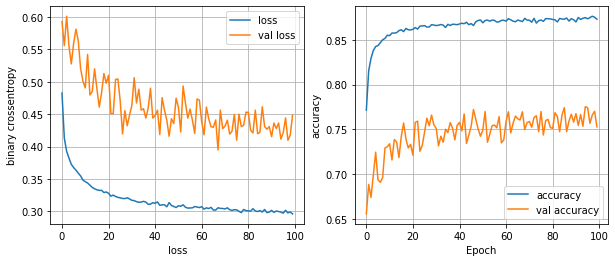

154/154 [==============================] - 0s 2ms/step - loss: 0.3656 - accuracy: 0.8351
Nodes: 32, Dropout: 0.2, LR: 0.001, Batch Size: 128


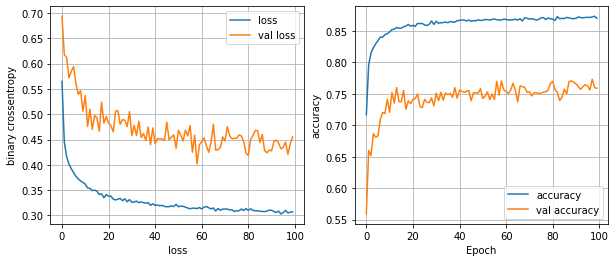

154/154 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.8408
Nodes: 32, Dropout: 0.2, LR: 0.0001, Batch Size: 16


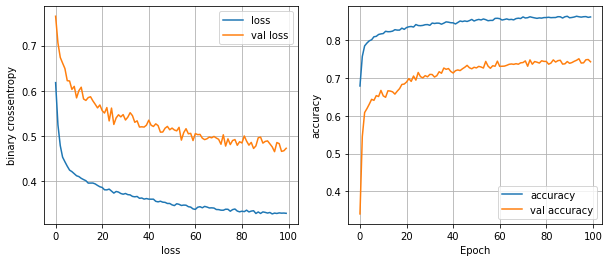

154/154 [==============================] - 0s 2ms/step - loss: 0.3741 - accuracy: 0.8308
Nodes: 32, Dropout: 0.2, LR: 0.0001, Batch Size: 32


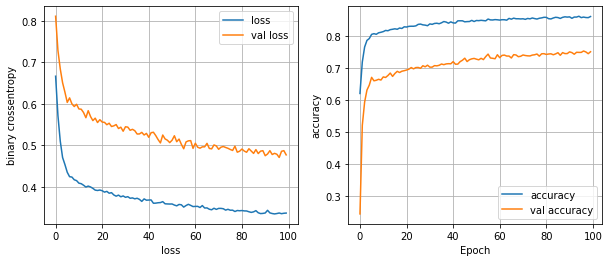

154/154 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8310
Nodes: 32, Dropout: 0.2, LR: 0.0001, Batch Size: 128


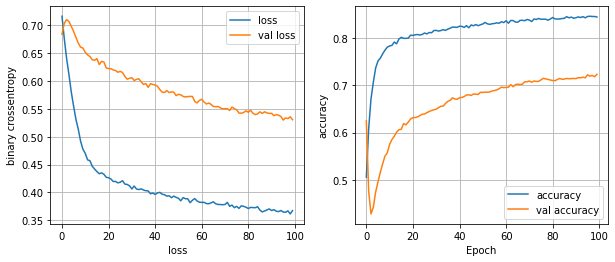

154/154 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8172
Nodes: 32, Dropout: 0.2, LR: 0.005, Batch Size: 16


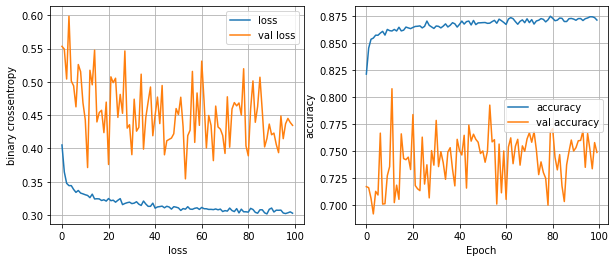

154/154 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.8339
Nodes: 32, Dropout: 0.2, LR: 0.005, Batch Size: 32


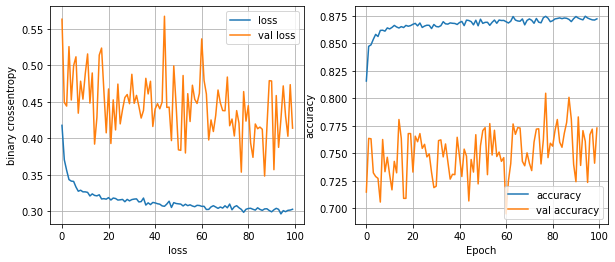

154/154 [==============================] - 0s 2ms/step - loss: 0.3606 - accuracy: 0.8377
Nodes: 32, Dropout: 0.2, LR: 0.005, Batch Size: 128


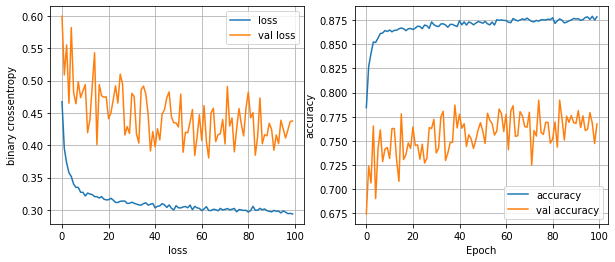

154/154 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8459
Nodes: 32, Dropout: 0.2, LR: 0.003, Batch Size: 16


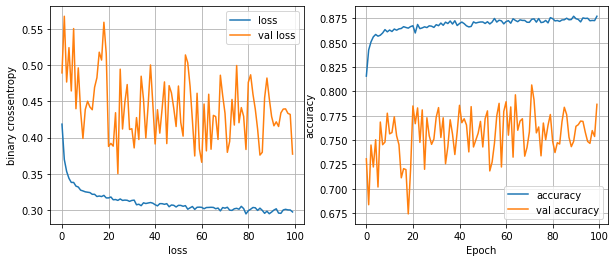

154/154 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8424
Nodes: 32, Dropout: 0.2, LR: 0.003, Batch Size: 32


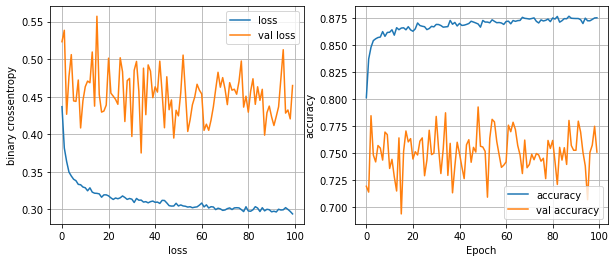

154/154 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8379
Nodes: 32, Dropout: 0.2, LR: 0.003, Batch Size: 128


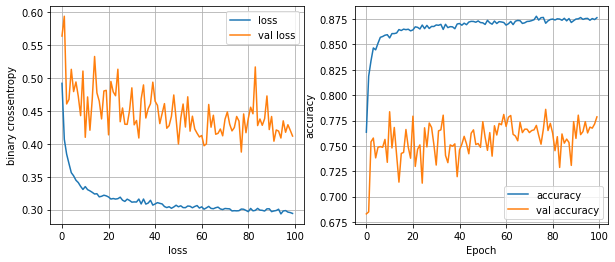

154/154 [==============================] - 0s 2ms/step - loss: 0.3601 - accuracy: 0.8377
Nodes: 64, Dropout: 0, LR: 0.1, Batch Size: 16


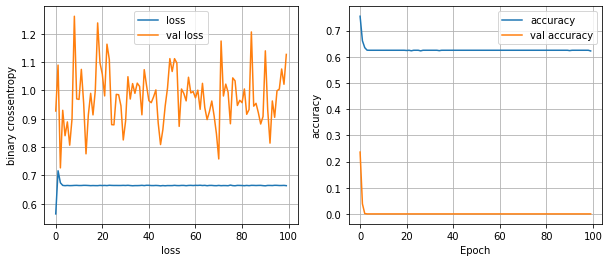

154/154 [==============================] - 0s 2ms/step - loss: 0.7593 - accuracy: 0.5000
Nodes: 64, Dropout: 0, LR: 0.1, Batch Size: 32


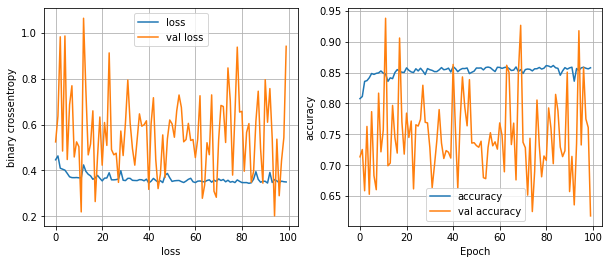

154/154 [==============================] - 0s 2ms/step - loss: 0.5736 - accuracy: 0.7843
Nodes: 64, Dropout: 0, LR: 0.1, Batch Size: 128


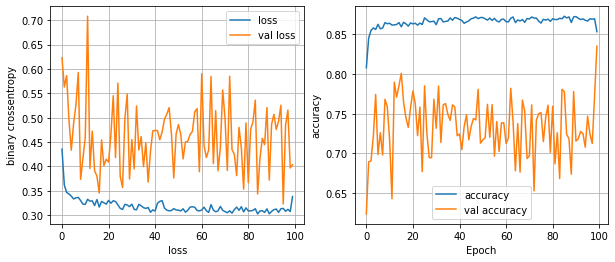

154/154 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8243
Nodes: 64, Dropout: 0, LR: 0.001, Batch Size: 16


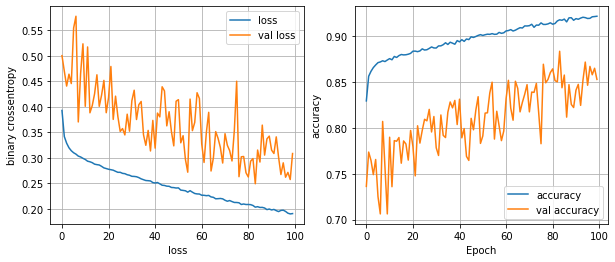

154/154 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.8316
Nodes: 64, Dropout: 0, LR: 0.001, Batch Size: 32


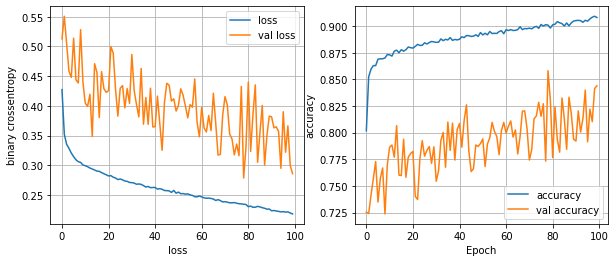

154/154 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8457
Nodes: 64, Dropout: 0, LR: 0.001, Batch Size: 128


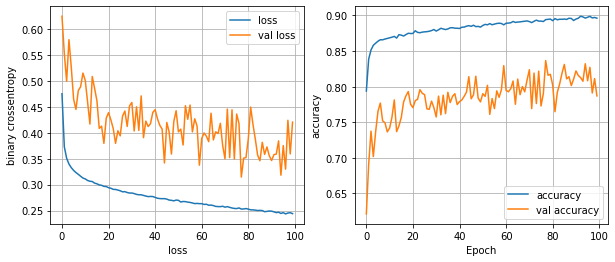

154/154 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8333
Nodes: 64, Dropout: 0, LR: 0.0001, Batch Size: 16


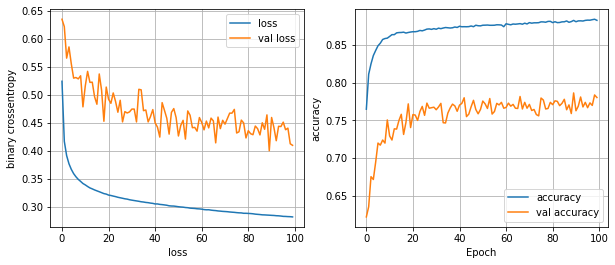

154/154 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8392
Nodes: 64, Dropout: 0, LR: 0.0001, Batch Size: 32


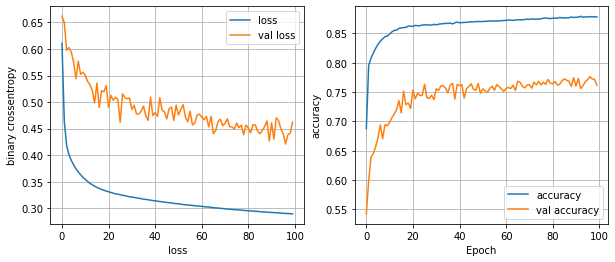

154/154 [==============================] - 0s 2ms/step - loss: 0.3702 - accuracy: 0.8394
Nodes: 64, Dropout: 0, LR: 0.0001, Batch Size: 128


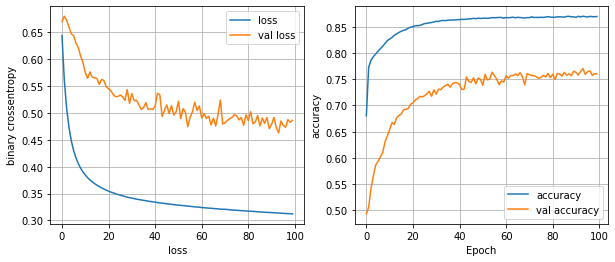

154/154 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.8274
Nodes: 64, Dropout: 0, LR: 0.005, Batch Size: 16


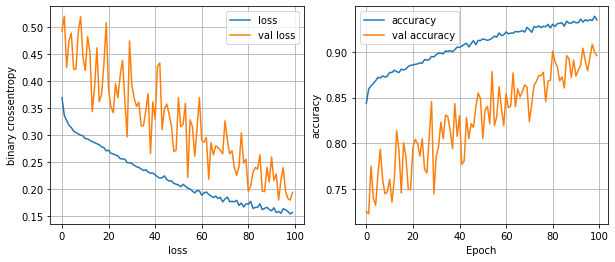

154/154 [==============================] - 0s 2ms/step - loss: 0.7079 - accuracy: 0.8361
Nodes: 64, Dropout: 0, LR: 0.005, Batch Size: 32


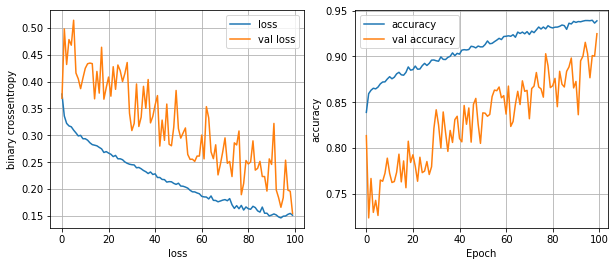

154/154 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.8306
Nodes: 64, Dropout: 0, LR: 0.005, Batch Size: 128


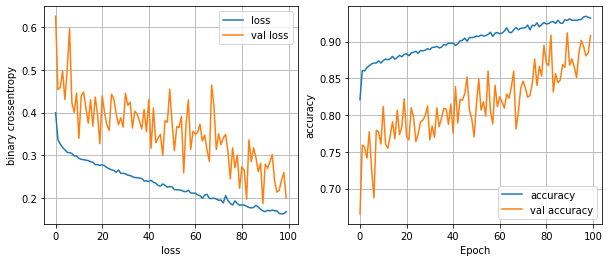

154/154 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.8359
Nodes: 64, Dropout: 0, LR: 0.003, Batch Size: 16


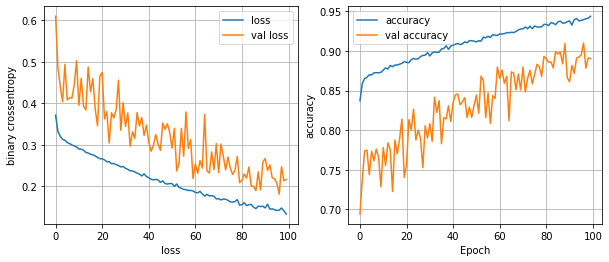

154/154 [==============================] - 0s 2ms/step - loss: 0.7752 - accuracy: 0.8184
Nodes: 64, Dropout: 0, LR: 0.003, Batch Size: 32


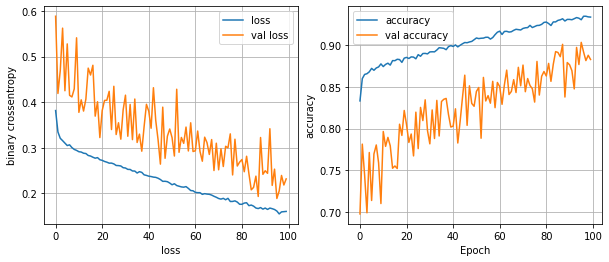

154/154 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.8353
Nodes: 64, Dropout: 0, LR: 0.003, Batch Size: 128


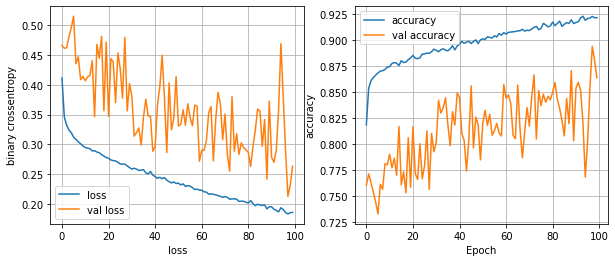

154/154 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.8335
Nodes: 64, Dropout: 0.2, LR: 0.1, Batch Size: 16


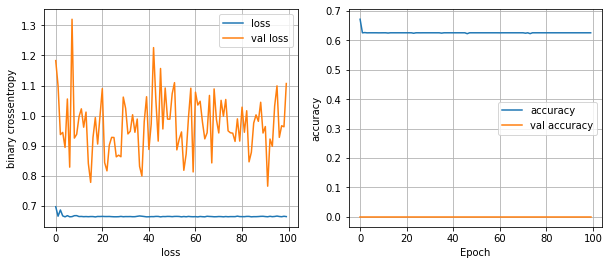

154/154 [==============================] - 0s 2ms/step - loss: 0.7540 - accuracy: 0.5000
Nodes: 64, Dropout: 0.2, LR: 0.1, Batch Size: 32


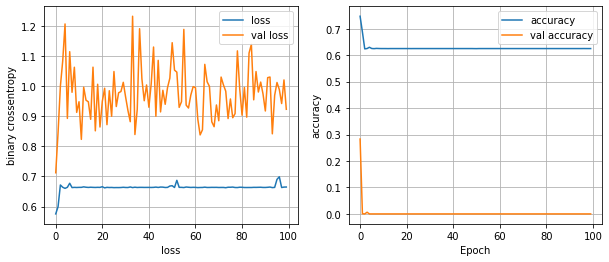

154/154 [==============================] - 0s 2ms/step - loss: 0.7146 - accuracy: 0.5000
Nodes: 64, Dropout: 0.2, LR: 0.1, Batch Size: 128


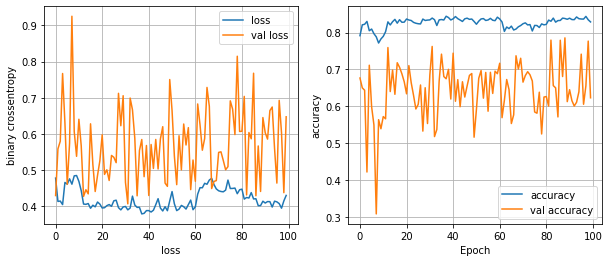

154/154 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.7762
Nodes: 64, Dropout: 0.2, LR: 0.001, Batch Size: 16


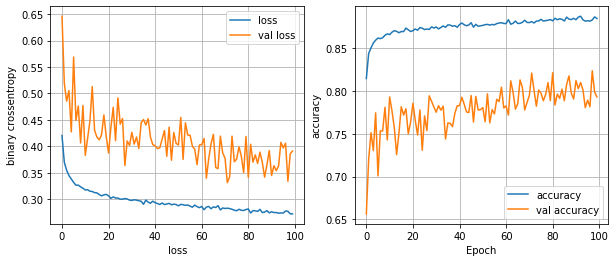

154/154 [==============================] - 0s 2ms/step - loss: 0.3578 - accuracy: 0.8503
Nodes: 64, Dropout: 0.2, LR: 0.001, Batch Size: 32


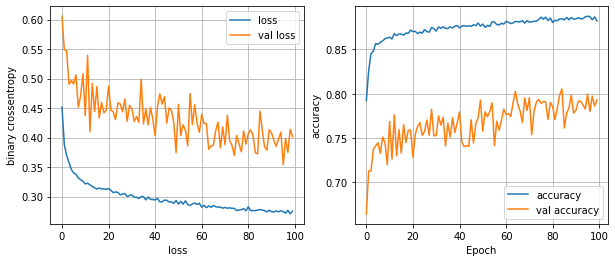

154/154 [==============================] - 0s 2ms/step - loss: 0.3566 - accuracy: 0.8499
Nodes: 64, Dropout: 0.2, LR: 0.001, Batch Size: 128


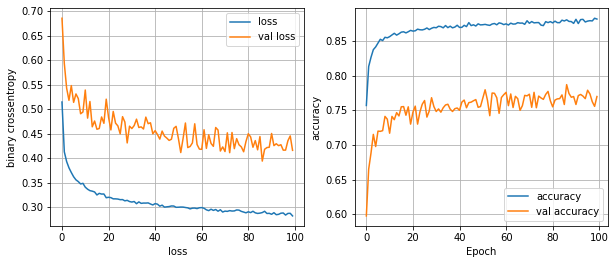

154/154 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.8452
Nodes: 64, Dropout: 0.2, LR: 0.0001, Batch Size: 16


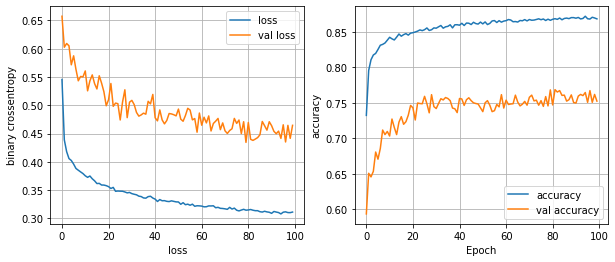

154/154 [==============================] - 0s 2ms/step - loss: 0.3707 - accuracy: 0.8359
Nodes: 64, Dropout: 0.2, LR: 0.0001, Batch Size: 32


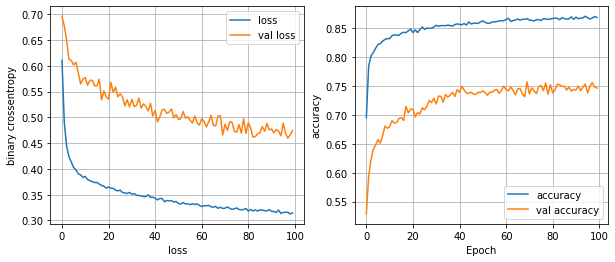

154/154 [==============================] - 0s 2ms/step - loss: 0.3747 - accuracy: 0.8333
Nodes: 64, Dropout: 0.2, LR: 0.0001, Batch Size: 128


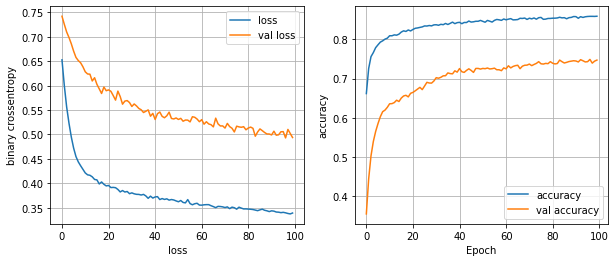

154/154 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8312
Nodes: 64, Dropout: 0.2, LR: 0.005, Batch Size: 16


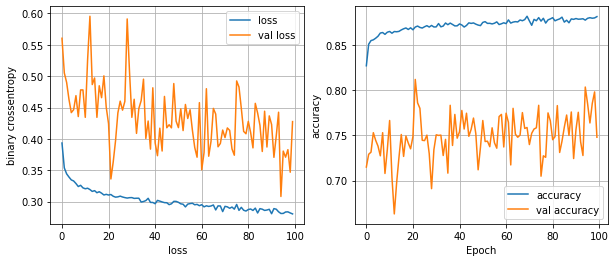

154/154 [==============================] - 0s 2ms/step - loss: 0.3829 - accuracy: 0.8225
Nodes: 64, Dropout: 0.2, LR: 0.005, Batch Size: 32


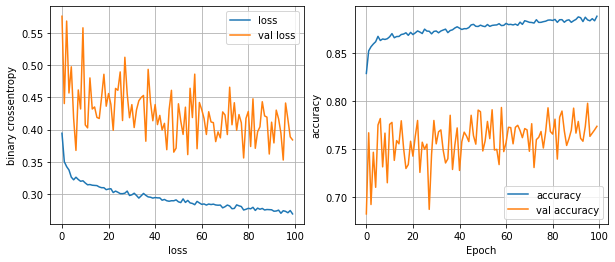

154/154 [==============================] - 0s 2ms/step - loss: 0.3702 - accuracy: 0.8373
Nodes: 64, Dropout: 0.2, LR: 0.005, Batch Size: 128


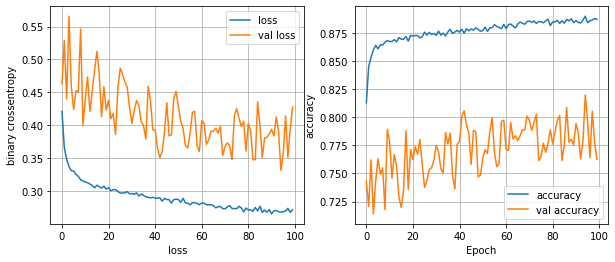

154/154 [==============================] - 0s 2ms/step - loss: 0.3814 - accuracy: 0.8438
Nodes: 64, Dropout: 0.2, LR: 0.003, Batch Size: 16


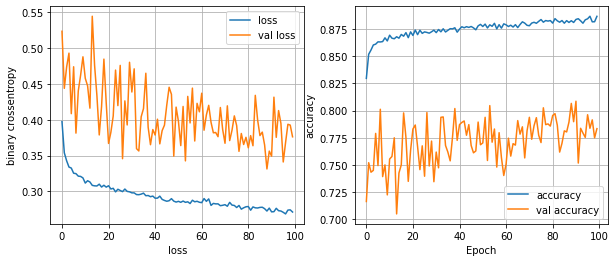

154/154 [==============================] - 0s 2ms/step - loss: 0.3607 - accuracy: 0.8477
Nodes: 64, Dropout: 0.2, LR: 0.003, Batch Size: 32


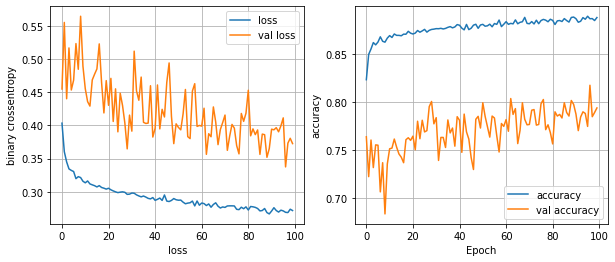

154/154 [==============================] - 0s 2ms/step - loss: 0.3618 - accuracy: 0.8465
Nodes: 64, Dropout: 0.2, LR: 0.003, Batch Size: 128


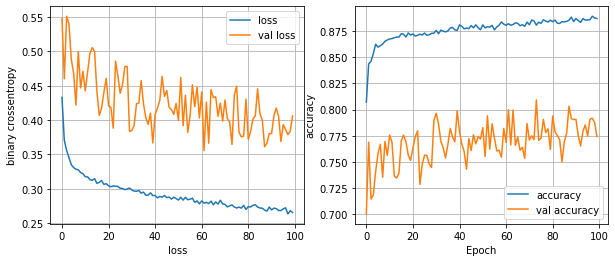

154/154 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.8420


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.1, 0.001, 0.0001, 0.005, 0.003]:
      for batch_size in [16, 32, 128]:
        print(f"Nodes: {num_nodes}, Dropout: {dropout_prob}, LR: {lr}, Batch Size: {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
pred = least_loss_model.predict(X_test)
pred = (pred > 0.5).astype('int').reshape(-1, )
pred

119/119 [==============================] - 0s 2ms/step


array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1353
           1       0.89      0.89      0.89      2451

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

